In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
f = '../resultados/iluminancia/A40-2_anual.ill'



def load_ill(f, ny=100, nx=120, horas_por_dia=24):
    # 1. Cargar datos numéricos saltando el encabezado de Radiance
    data = np.loadtxt(f, skiprows=11)  # shape: (NROWS, NCOLS)
    
    nrows, ncols = data.shape
    # print("shape original:", data.shape)

    # 2. Chequeos básicos
    if nrows != ny * nx:
        raise ValueError(
            f"NROWS ({nrows}) != ny*nx ({ny*nx}). Revisa ny, nx o el archivo .ill."
        )

    if ncols % horas_por_dia != 0:
        raise ValueError(
            f"NCOLS ({ncols}) no es múltiplo de horas_por_dia ({horas_por_dia})."
        )

    ndias = ncols // horas_por_dia  # número de días

    # 3. Reacomodar:
    # data: (ny*nx, ncols) -> (ny, nx, ndias, horas_por_dia)
    arr = data.reshape(ny, nx, ndias, horas_por_dia)

    # 4. Pasar a (ndias, horas, ny, nx) para usar ill[dia][hora]
    ill = np.transpose(arr, (2, 3, 0, 1))

    return ill  # shape: (ndias, horas_por_dia, ny, nx)
ill = load_ill(f,ny=100,nx=120,horas_por_dia=24)
ill.shape

(1, 24, 100, 120)

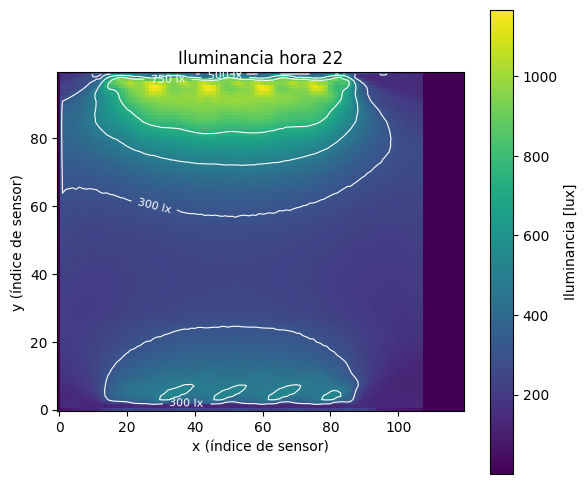

In [65]:
posicion = 22  # p.ej. hora 4
campo = ill[0, posicion]   # matriz 2D (100x120)

fig, ax = plt.subplots(figsize=(6, 5))

# Imagen base
im = ax.imshow(
    campo,
    origin="lower",      # para que (0,0) esté abajo a la izquierda
    # cmap="viridis",    # opcional, si quieres un mapa de colores específico
)

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Iluminancia [lux]")   # etiqueta opcional

# Líneas de nivel (iso-lineas)
# Define niveles (ajusta según tus valores típicos)
levels = [ 300, 500, 750, 1500, 2000, 3000, 4000, 5000, 6000]

cs = ax.contour(
    campo,
    levels=levels,
    colors="white",      # o "black", según se vea mejor
    linewidths=0.8
)

# Etiquetas sobre las iso-líneas
ax.clabel(cs, fmt="%d lx", inline=True, fontsize=8)

ax.set_title(f"Iluminancia hora {posicion}")
ax.set_xlabel("x (índice de sensor)")
ax.set_ylabel("y (índice de sensor)")

plt.tight_layout()
plt.show()
